This notebook will walk through a comparison of different thresholding approaches for fMRI data.  The example data used here are from the UCLA CNP Dataset; the specific contrast used is the comparison of go trials to baseline for the stop signal task.  Data are from the first 125 subjects in the dataset; these data were used to generate datasets of smaller sizes (25,50,75, and 100 subjects) for comparison across different smaple sizes.  

First we need to set up our environment.  

In [54]:
import nibabel
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting

%matplotlib inline

Now let's load up the data files for each of the datasets, starting with the raw t statistic maps.

In [55]:
nvals=[25,50,75,100,125]
tstat={}
for n in nvals:
    tstat[n]=nibabel.load('data/tt_%dsubs_tstat1.nii.gz'%n).get_data()


In [56]:
maskimg=nibabel.load('data/mask.nii.gz')
mask=maskimg.get_data()
maskvox=numpy.where(mask>0)

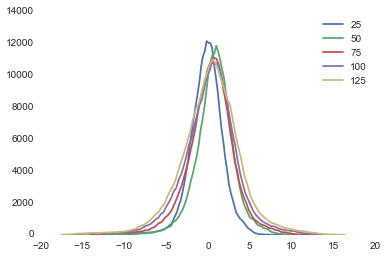

In [57]:
for n in nvals:
    h,b=numpy.histogram(tstat[n][maskvox],bins=100)
    plt.plot(b[1:],h)
plt.legend(nvals)


Now load the GRF maps created using FSL's cluster tool.


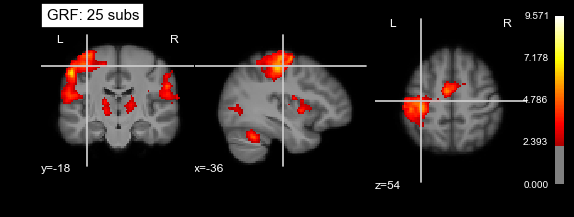

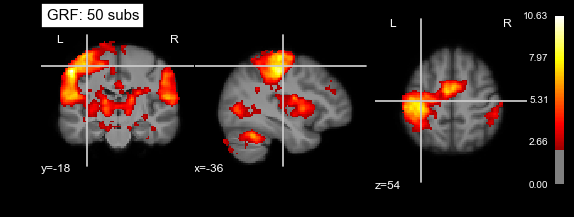

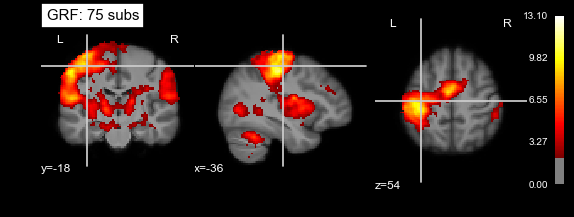

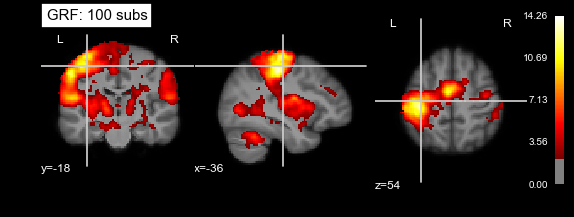

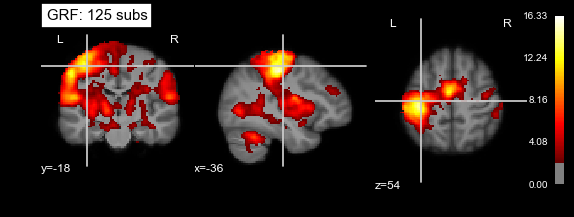

In [58]:
grfdata={}
grf_nvox={}
for n in nvals:
    img=nibabel.load('data/thresh_%dsubs.nii.gz'%n)
    grfdata[n]=img.get_data()
    grf_nvox[n]=numpy.sum(grfdata[n]>0)
    plotting.plot_stat_map('data/thresh_%dsubs.nii.gz'%n, bg_img='data/bg_image.nii.gz',
                       threshold=2.3, title="GRF: %d subs"%n,
                       cut_coords=(-36,-18,54))
    

Now do the same for FDR data

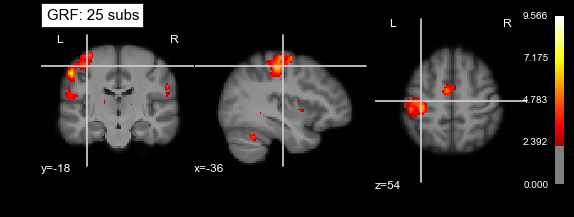

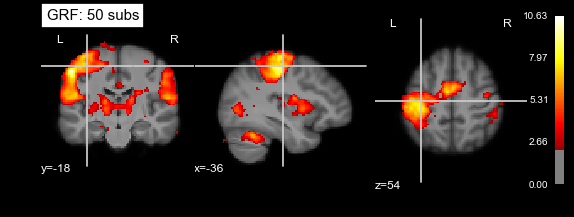

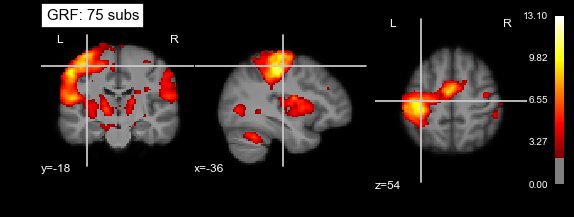

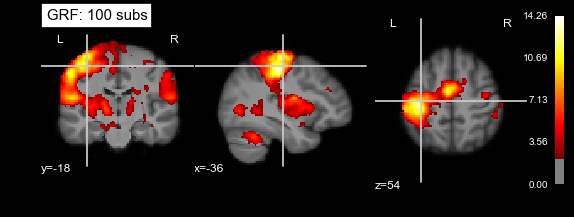

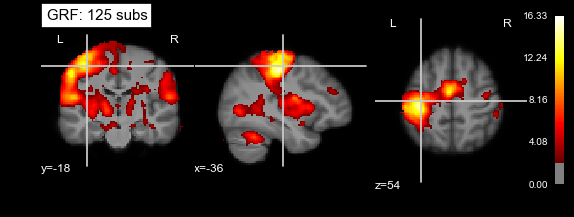

In [59]:
fdrdata={}
fdr_nvox={}
for n in nvals:
    img=nibabel.load('data/fdr_tstat_%dsubs.nii.gz'%n)
    grfdata[n]=img.get_data()
    grf_nvox[n]=numpy.sum(grfdata[n]>0)
    plotting.plot_stat_map(img, bg_img='data/bg_image.nii.gz',
                       threshold=2.3, title="FDR: %d subs"%n,
                       cut_coords=(-36,-18,54))
